# IUCN Initial Requests

## Prep

In [ ]:
# import resources

import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot  as plt
import geopandas as gpd

### Acknowledgements
- IUCN 2025. IUCN Red List of Threatened Species. Version 2025-2 <www.iucnredlist.org>
- UNEP-WCMC and IUCN (2026), Protected Planet: The World Database on Protected Areas (WDPA) and World Database on Other Effective Area-based Conservation Measures (WD-OECM) [Online], February 2026, Cambridge, UK: UNEP-WCMC and IUCN. Available at: <www.protectedplanet.net.>

## Request the data from IUCN

### Start with Kenyan data

In [ ]:
# save api constants
base_url = 'https://api.iucnredlist.org/api/v4'

headers = ({
    # 'User-Agent':'KenyaDataDefficientSpeciesMonitoring/1.0'
    'Authorization': f'Bearer {api_key}'
})

params = 'red_list_categories'

In [ ]:
# check if the site can be accessed

url = f"{base_url}/{params}"

response = requests.get(url,
                        headers = headers,
                        timeout=5)

print("status code:", response.status_code)
print("content type:", response.headers.get("Content-Type"))

status code: 200
content type: application/json


In [30]:
red_list_categories = response.json()

In [ ]:
# request Kenya data
params = {'countries'{'code' : 'KE'}}

url = f"{base_url}/{params}"

try:
    response = requests.get(url,
                        headers = headers,
                        timeout=5)
    response.raise_for_status()
except requests.exceptions.HTTPError as err:
    print(f'Error: {err}')  # 404 not found
except requests.exceptions.ConnectionError as err:
    print(f'Error: Cannot connect to server')

In [ ]:
data = response.json()

{'kingdom_names': ['ANIMALIA', 'CHROMISTA', 'FUNGI', 'PLANTAE']}

In [ ]:
df_kenya = pd.Series(response)

df_kenya.info()

0    b'{"kingdom_names":["ANIMALIA","CHROMISTA","FU...
dtype: object

## Explore the data

In [2]:
data = pd.read_csv(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\simple_summary.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41949 entries, 0 to 41948
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assessmentId     41949 non-null  int64  
 1   internalTaxonId  41949 non-null  int64  
 2   scientificName   41949 non-null  object 
 3   kingdomName      41949 non-null  object 
 4   phylumName       41949 non-null  object 
 5   orderName        41949 non-null  object 
 6   className        41949 non-null  object 
 7   familyName       41949 non-null  object 
 8   genusName        41949 non-null  object 
 9   speciesName      41949 non-null  object 
 10  infraType        1641 non-null   object 
 11  infraName        1641 non-null   object 
 12  infraAuthority   0 non-null      float64
 13  authority        41657 non-null  object 
 14  redlistCategory  41949 non-null  object 
 15  redlistCriteria  13869 non-null  object 
 16  criteriaVersion  41949 non-null  float64
 17  populationTr

In [7]:
data['redlistCategory'].unique()

array(['Near Threatened', 'Vulnerable', 'Endangered',
       'Critically Endangered', 'Data Deficient', 'Least Concern',
       'Extinct in the Wild', 'Extinct', 'Regionally Extinct',
       'Lower Risk/near threatened', 'Not Applicable',
       'Lower Risk/least concern', 'Lower Risk/conservation dependent'],
      dtype=object)

In [8]:
data['populationTrend'].unique()

array(['Decreasing', 'Unknown', 'Stable', 'Increasing', nan], dtype=object)

In [19]:
species_by_category = data.groupby('redlistCategory')[['speciesName']].count().sort_values(by='speciesName', ascending=False).reset_index()

species_by_category

,redlistCategory,speciesName
0,Least Concern,23252
1,Endangered,5543
2,Vulnerable,4507
3,Data Deficient,3842
4,Critically Endangered,2497
5,Near Threatened,1854
6,Extinct,172
7,Not Applicable,142
8,Lower Risk/near threatened,79
9,Regionally Extinct,27


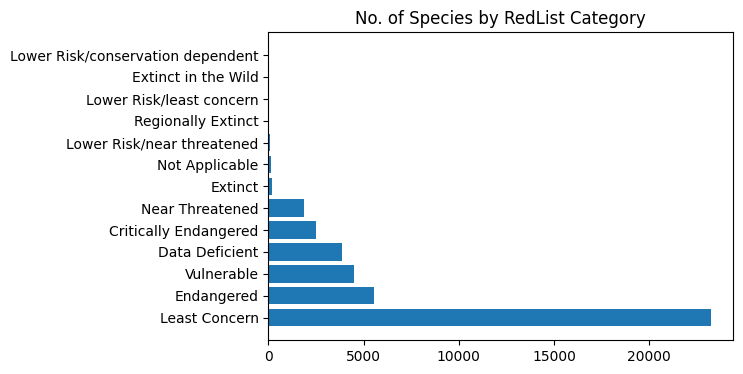

In [41]:
plt.figure(figsize=(6,4))
plt.barh(species_by_category['redlistCategory'],species_by_category['speciesName'])
plt.title('No. of Species by RedList Category')

plt.show()

In [ ]:
species_by_populationTrend = data.groupby('populationTrend')[['speciesName']].count().sort_values(by='speciesName', ascending=False).reset_index()

species_by_populationTrend

,populationTrend,speciesName
0,Unknown,22224
1,Decreasing,11066
2,Stable,7217
3,Increasing,362


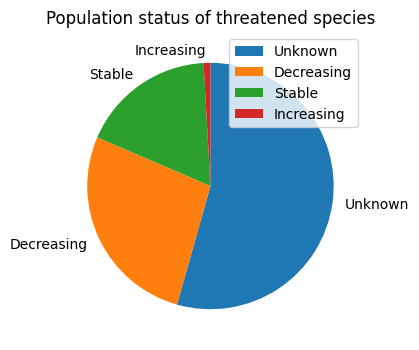

In [ ]:
plt.figure(figsize=(4,4))
plt.title('Population Trend of Threatened Species')
plt.pie(species_by_populationTrend['speciesName'],
        labels=species_by_populationTrend['populationTrend'],
        startangle=90.0,
        counterclock=False)
plt.legend()

plt.show()

In [ ]:
categories_by_populationTrend = data.set_index(['redlistCategory', 
                                                'populationTrend']).sort_index()

categories_by_populationTrend[['kingdomName',
                               'phylumName',
                               'scientificName']]

kingdomName    phylumName  \
redlistCategory       populationTrend                             
Critically Endangered Decreasing         ANIMALIA      CHORDATA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
...                                           ...           ...   
Vulnerable            NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                ANIMALIA      CHORDATA   
                      NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                 PLANTAE  TRACHEOPHYTA   

                                                  scientificName  
redlistCategory       populationTrend                             
Critically Endangered Decreasing          Malacochersus tornieri  
                      Decreasing           Saintpaulia teitensis  
                      Decreasing          Impatiens simbiniensis  
                      Decreasing           Impatiens cinnabarina  
                      Decreasing                   Ochna braunii  
...                                                          ...  
Vulnerable            NaN                          Cola letestui  
                      NaN              Campylospermum amplectens  
                      NaN                       Chersobius solus  
                      NaN                    Euphorbia doloensis  
                      NaN               Chamaecrista aldabrensis  

[41949 rows x 3 columns]

### Maps?

In [56]:
gdf = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\PLANTS\PLANTS_PART1.shp")

gdf

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,30313,Picea omorika,1,1,1,"D. Allen, IUCN",2016,European Red List,None,None,...,PINALES,PINACEAE,Picea,EN,false,true,false,2.490737,0.088185,"MULTIPOLYGON (((19.68166 43.42351, 19.6823 43...."
1,30316,Rhamnus persicifolia,1,1,1,IUCN,2017,IUCN (International Union for Conservation of ...,None,None,...,ROSALES,RHAMNACEAE,Rhamnus,EN,false,true,false,1.519836,0.036784,"MULTIPOLYGON (((9.28876 39.84226, 9.28823 39.8..."
2,30318,Tetraclinis articulata,1,1,1,"Catford, R.",2011,International Union for Conservation of Nature...,None,None,...,PINALES,CUPRESSACEAE,Tetraclinis,LC,false,true,false,1.196384,0.031991,"MULTIPOLYGON (((14.45858 35.82632, 14.45832 35..."
3,30322,Arbutus canariensis,1,1,1,Isabel Santana-López; Emily Beech,2017,BGCI,None,None,...,ERICALES,ERICACEAE,Arbutus,NT,false,true,false,0.076900,0.000184,"MULTIPOLYGON (((-16.82108 28.34258, -16.821 28..."
4,30322,Arbutus canariensis,3,1,1,Isabel Santana-López; Emily Beech,2017,BGCI,None,None,...,ERICALES,ERICACEAE,Arbutus,NT,false,true,false,4.153551,0.031943,"MULTIPOLYGON (((-17.98338 27.78089, -17.98325 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,266298426,Cyanea macrostegia,1,1,1,"Shapefiles from Jon Price, UH Hilo, Compiled b...",2021,Hawaiian Native Plant Working Group,None,None,...,ASTERALES,CAMPANULACEAE,Cyanea,EN,false,true,false,2.900752,0.163602,"MULTIPOLYGON (((-156.13189 20.85897, -156.1319..."
5275,269413442,Cyclamen graecum,1,1,1,James Westrip,2024,IUCN (International Union for Conservation of ...,None,None,...,ERICALES,PRIMULACEAE,Cyclamen,LC,false,true,false,121.497513,6.556245,"MULTIPOLYGON (((25.76347 35.13042, 25.76347 35..."
5276,270349007,Scrophularia gypsicola,1,1,1,Mehmet Erkan Uzunhisarcıklı,2022,"Mehmet Erkan Uzunhisarcıklı, The Red List of T...",None,None,...,LAMIALES,SCROPHULARIACEAE,Scrophularia,CR,false,true,false,4.140917,0.347091,"POLYGON ((37.73898 39.36865, 37.73938 39.36801..."
5277,270349472,Oenanthe cyclocarpa,1,1,1,Ebru Doğan Güner,2022,"Ebru Doğan Güner, The Red List of Turkey's End...",None,None,...,APIALES,APIACEAE,Oenanthe,EN,false,true,false,8.795844,0.215375,"MULTIPOLYGON (((28.03486 36.88276, 28.03477 36..."


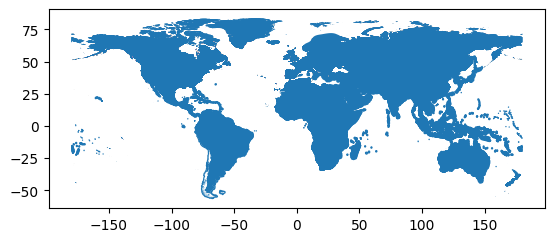

In [57]:
gdf.plot()
plt.show()

In [58]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_no       5279 non-null   int64   
 1   sci_name    5279 non-null   object  
 2   presence    5279 non-null   int32   
 3   origin      5279 non-null   int32   
 4   seasonal    5279 non-null   int32   
 5   compiler    5187 non-null   object  
 6   yrcompiled  5279 non-null   int32   
 7   citation    5279 non-null   object  
 8   subspecies  40 non-null     object  
 9   subpop      37 non-null     object  
 10  source      2279 non-null   object  
 11  island      1104 non-null   object  
 12  tax_comm    0 non-null      object  
 13  dist_comm   90 non-null     object  
 14  generalisd  5279 non-null   int32   
 15  legend      5279 non-null   object  
 16  kingdom     5279 non-null   object  
 17  phylum      5279 non-null   object  
 18  class       5279 non-null   object  
 19

In [59]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich